In [1]:
# Random Forest Classification
import pandas as pd 
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
dataset = pd.read_csv("C:\\Users\\Asus\\Company_Data.csv")
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
dataset.shape

(400, 11)

In [4]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [5]:
dataset['ShelveLoc']=le.fit_transform(dataset['ShelveLoc'])
dataset['Urban']=le.fit_transform(dataset['Urban'])
dataset['US']=le.fit_transform(dataset['US'])
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [6]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [7]:
#checking null values in dataset 
dataset.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

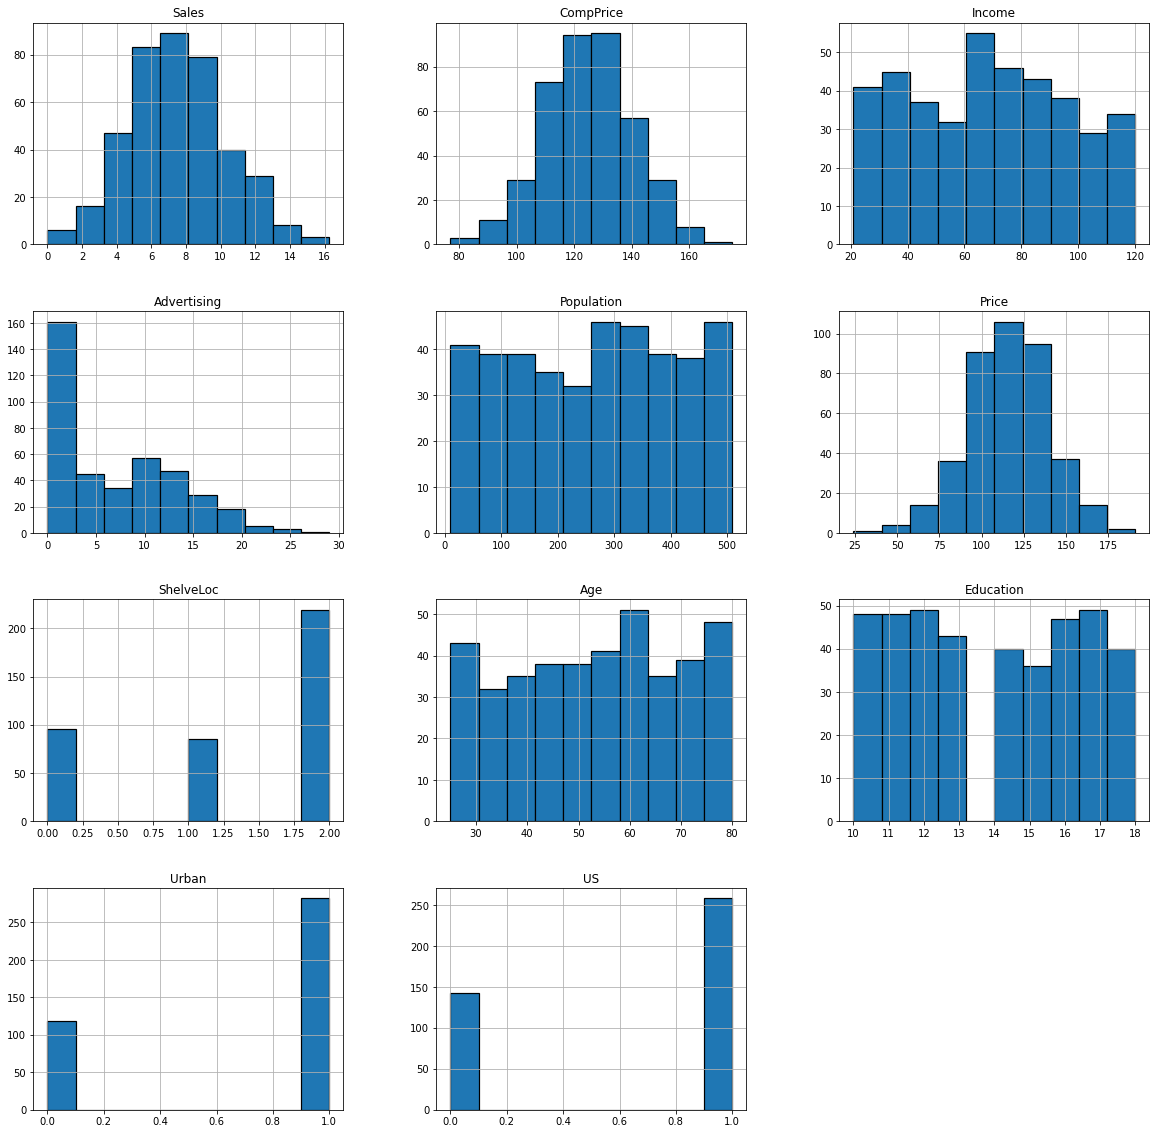

In [9]:
dataset.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [49]:
col_names = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
for col in col_names:
    
    print(dataset[col].value_counts()) 

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64
121    16
131    14
122    14
123    13
115    12
       ..
154     1
155     1
156     1
161     1
77      1
Name: CompPrice, Length: 73, dtype: int64
69     11
42     10
32      8
100     8
60      7
       ..
112     1
109     1
108     1
43      1
95      1
Name: Income, Length: 98, dtype: int64
0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
15     12
4      12
8      11
14     11
16     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
22      2
23      2
24      1
25      1
26      1
21      1
29      1
Name: Advertising, dtype: int64
170    4
148    4
220    4
125    4
237    4
      ..
304    1
297    1
296    1
294    1
10     1
Name: Population, Length: 275, dtype: int64
128    12
120    12
104    10
131    10
107    10
       ..
163     1
164     1
171 

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [51]:
r=dataset[dataset['Sales'] >= 10 ].index
dataset.loc[dataset[dataset['Sales']<10].index,'Sales']="NO"
dataset.loc[r,'Sales']="Yes"
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,NO,138,73,11,276,120,0,42,17,1,1
1,Yes,111,48,16,260,83,1,65,10,1,1
2,Yes,113,35,10,269,80,2,59,12,1,1
3,NO,117,100,4,466,97,2,55,14,1,1
4,NO,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,Yes,138,108,17,203,128,1,33,14,1,1
396,NO,139,23,3,37,120,2,55,11,0,1
397,NO,162,26,12,368,159,2,40,18,1,1
398,NO,100,79,7,284,95,0,50,12,1,1


In [52]:
X = dataset.drop(['Sales'], axis=1)
y = dataset['Sales']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [54]:

X_train.shape, X_test.shape

((280, 10), (120, 10))

In [55]:
X_train.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object

In [56]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0, max_features=3)
rf=rfc_100.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_pred

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'Yes', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'Yes', 'NO', 'NO', 'Yes', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'Yes', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'Yes',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'Yes', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'Yes', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'Yes', 'NO', 'NO', 'NO', 'Yes', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'Yes', 'NO', 'NO', 'Yes', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'Yes', 'NO', 'NO', 'Yes', 'NO', 'NO', 'NO', 'NO'],
      dtype=object)

In [57]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8583


In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[93  3]
 [14 10]]


In [59]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.87      0.97      0.92        96
         Yes       0.77      0.42      0.54        24

    accuracy                           0.86       120
   macro avg       0.82      0.69      0.73       120
weighted avg       0.85      0.86      0.84       120



In [60]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Price          0.226832
Advertising    0.134287
Age            0.128053
CompPrice      0.104985
ShelveLoc      0.101669
Population     0.101459
Income         0.100381
Education      0.068727
US             0.019172
Urban          0.014436
dtype: float64

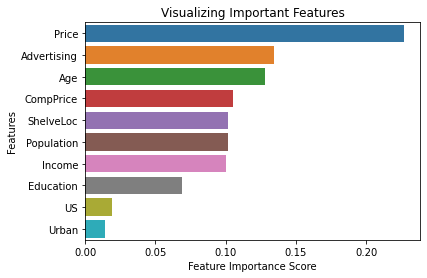

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(rfc_100, X, y, cv=kfold)
results.mean()

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8550000000000001

### Using XGBoost for improving Accuracy

In [63]:
!pip install xgboost 

In [64]:
from xgboost import XGBClassifier

In [65]:
xgb = XGBClassifier(n_estimators=100)

In [69]:
xgb.fit(X_train, Y_train)

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xgb.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[89  7]
 [ 5 19]]


0.9

### After using xgboost accuracy is better than random forest classifier